
##  所选数据集为Video Game Sales 电子游戏销售分析；
GitHub地址为：https://github.com/JAF963/homework3
#数据集地址为：https://www.kaggle.com/gregorut/videogamesales；

## 数据集介绍
数据集有1.66W的数据量，共11列，即包含11个属性字段，分别为：

RANK-总销售额的排名

Name-游戏的名字

Platform-游戏发布平台(即PC,PS4等)

Year-游戏发行的年份

Genre-游戏的类型

Publisher-游戏的出版者

NA_Sales -北美销售额(百万)

EU_Sales -欧洲销售额(百万)

JP_Sales -日本销售额(百万)

Other_Sales—世界其他地区销售额(百万)

Global_Sales—全球销售总额


In [5]:
# -*- coding: utf-8 -*-

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

import sys
sys.path.append('../')
import csv
import math

import numpy as np
np.set_printoptions(threshold=np.inf)
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
# import pyecharts
import datetime
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  
plt.rcParams['axes.unicode_minus']=False 

plt.style.use("fivethirtyeight")


# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)


path = '/Users/yumingfei/Documents/Document/Postgraduate/课件/数据挖掘/数据集/vgsales.csv'
#导入数据
df = pd.read_csv(path)


In [7]:
# 介绍数据集
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
Name,16598,11493,Need for Speed: Most Wanted,12
Platform,16598,31,DS,2163
Genre,16598,12,Action,3316
Publisher,16540,578,Electronic Arts,1351


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


### 从上述信息分析来看：
一共有31个游戏平台，12个游戏类型，578个发行商；

### 从游戏市场分析来看：
几大市场中北美市场的平均销量最高，销量最大值也最高；而日本市场均销量最低，销量最大值也最低，与其他地区销售额差不多；

但同时，三大市场都存在分布极度不均匀的情况


## 对数据集进行处理，主要针对缺失数据

In [10]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
df[df['Publisher'].isnull()|df['Year'].isnull()].shape


(307, 11)

由于空值总行为307，总行数为16598，空行占总行数比例较少，不会对结果造成很大影响，因此直接将空行删除；

In [14]:
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16291.0,8290.190228,4792.654450,1.00,4132.50,8292.00,12439.50,16600.00
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


In [16]:
df.describe(include='object').T

,count,unique,top,freq
Name,16291,11325,Need for Speed: Most Wanted,12
Platform,16291,31,DS,2131
Genre,16291,12,Action,3251
Publisher,16291,576,Electronic Arts,1339


## 电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；
#### 对游戏的受欢迎类型进行分析，评测用户最喜欢的游戏类型

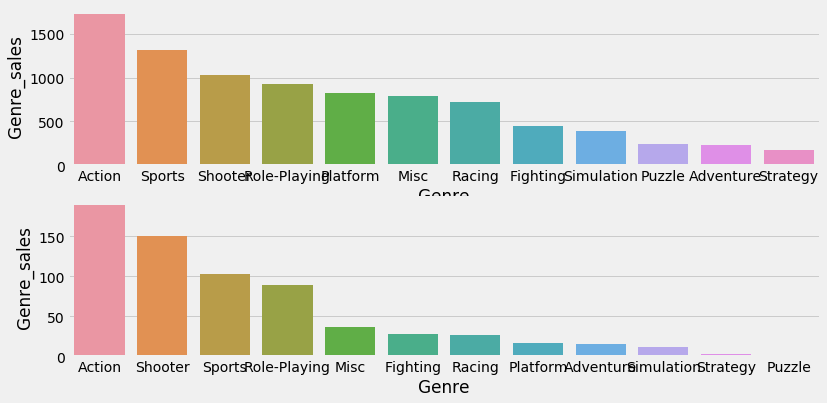

In [17]:
FGE=pd.pivot_table(df,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
FGE=pd.DataFrame(data=FGE,columns={'Genre_sales'})
FGE_near5=pd.pivot_table(df,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGE_near5=pd.DataFrame(data=FGE_near5,columns={'Genre_sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
sns.barplot(x=FGE.index,y='Genre_sales',data=FGE,ax=ax1)
sns.barplot(x=FGE_near5.index,y='Genre_sales',data=FGE_near5,ax=ax2)

通过对近五年的数据分析，可看出最受用户最喜爱的游戏类型依然是是action，动作类游戏，而射击类游戏超过了运动类，而platform类游戏和puzzle类游戏则逐渐不被用户所喜欢；

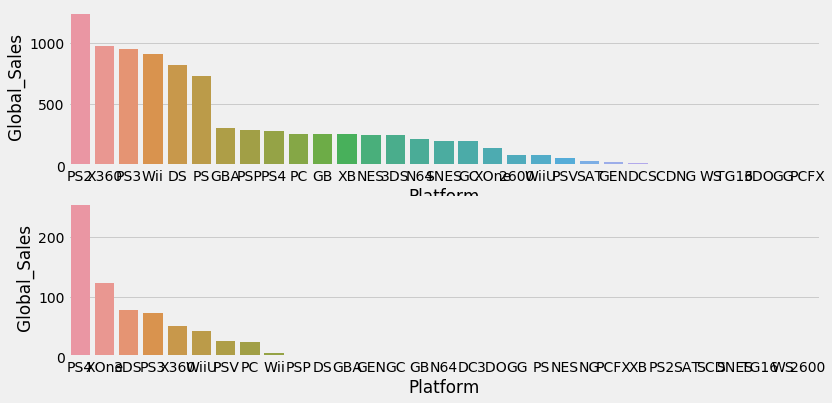

In [18]:
FPF=pd.pivot_table(df,index='Year',columns='Platform',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
FPF=pd.DataFrame(data=FPF,columns={'Global_Sales'})
FPF_near5=pd.pivot_table(df,index='Year',columns='Platform',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FPF_near5=pd.DataFrame(data=FPF_near5,columns={'Global_Sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
sns.barplot(x=FPF.index,y='Global_Sales',data=FPF,ax=ax1)
sns.barplot(x=FPF_near5.index,y='Global_Sales',data=FPF_near5,ax=ax2)

用户所喜爱的游戏平台的状况也在发生变化，PS4取代了PS2成为了用户最喜爱的游戏平台，3DS也取代了DS；


### 预测每年电子游戏销售额

Text(0.5, 1.0, '五大市场发展趋势')

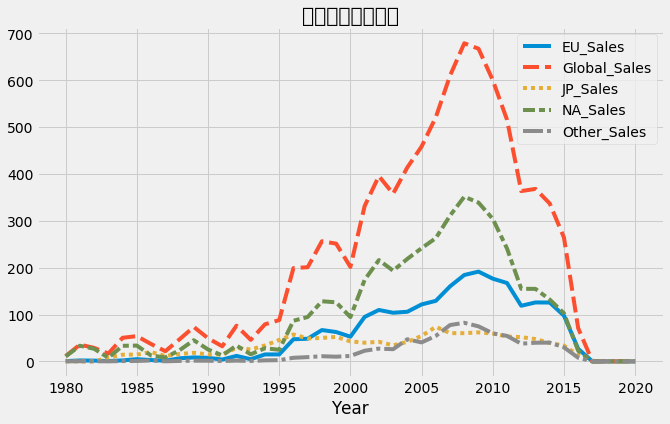

In [21]:
M=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
#绘制各地区销量走势图
df5market_p=pd.pivot_table(df,index='Year',values=M,aggfunc=np.sum)
fig=plt.figure(figsize=(10,6))
sns.lineplot(data=df5market_p)
plt.title('五大市场发展趋势')


从图像分析可以看出，从1995年各类销量开始增常，在2005-2010间销售量达到最高值，但是2015年后销售量开始下降；

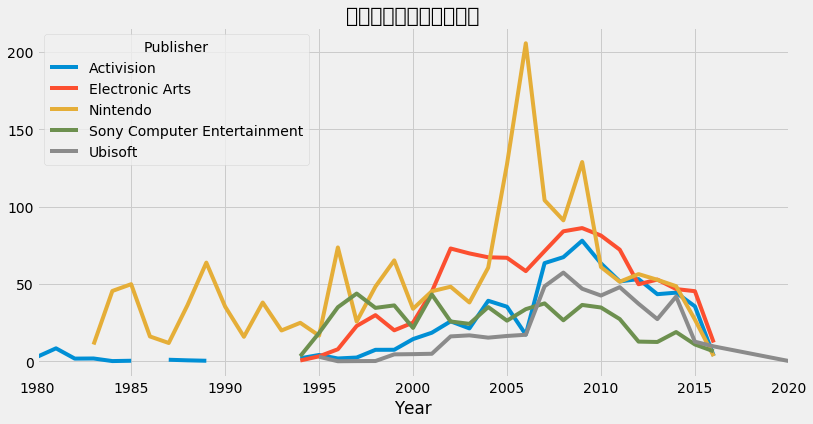

In [22]:
P=['Nintendo','Electronic Arts','Activision','Sony Computer Entertainment','Ubisoft']
df5PBL=df[df['Publisher'].isin(P)]
df5PBL_p=pd.pivot_table(data=df5PBL,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
df5PBL_p.plot(title='五大发行商历史销售情况',figsize=(12,6))

从五大publisher来对数据进行分析可以看出，Nintendo在2006年-2007年之间达到了峰值，而在2008-2009年之间，各大发行商均开始下降；


In [23]:
df5PBL_G_M_p=pd.pivot_table(data=df5PBL,index=['Genre','Publisher'],values=M,aggfunc=np.sum)
df5PBL_G_M_p.sort_values(by=['Genre','Global_Sales'],ascending=False).head() #这里必须对Genre排序不然会乱，只能对Genre分组

EU_Sales  Global_Sales  JP_Sales  \
Genre    Publisher                                                       
Strategy Nintendo                         4.29         26.72     10.46   
         Activision                       7.94         17.70      0.00   
         Electronic Arts                  4.10         14.08      0.44   
         Ubisoft                          4.03          8.45      0.09   
         Sony Computer Entertainment      0.70          2.34      1.04   

                                      NA_Sales  Other_Sales  
Genre    Publisher                                           
Strategy Nintendo                        11.22         0.77  
         Activision                       8.16         1.57  
         Electronic Arts                  8.84         0.67  
         Ubisoft                          3.23         1.12  
         Sony Computer Entertainment      0.34         0.28

In [24]:
df5PBL_G_M_p_pct=df5PBL_G_M_p.div(df5PBL_G_M_p.groupby(level=0).sum()).round(2)
df5PBL_G_M_p_pct=df5PBL_G_M_p_pct.sort_values(by=['Genre','Global_Sales'],ascending=False)
df5PBL_G_M_p_pct

EU_Sales  Global_Sales  JP_Sales  \
Genre        Publisher                                                       
Strategy     Nintendo                         0.20          0.39      0.87   
             Activision                       0.38          0.26      0.00   
             Electronic Arts                  0.19          0.20      0.04   
             Ubisoft                          0.19          0.12      0.01   
             Sony Computer Entertainment      0.03          0.03      0.09   
Sports       Electronic Arts                  0.58          0.55      0.07   
             Nintendo                         0.27          0.26      0.74   
             Activision                       0.07          0.09      0.00   
             Sony Computer Entertainment      0.05          0.07      0.18   
             Ubisoft                          0.03          0.03      0.00   
Simulation   Electronic Arts                  0.46          0.38      0.03   
             Nintendo                         0.33          0.36      0.85   
             Ubisoft                          0.15          0.19      0.03   
             Sony Computer Entertainment      0.03          0.04      0.09   
             Activision                       0.03          0.03      0.00   
Shooter      Activision                       0.48          0.46      0.27   
             Electronic Arts                  0.28          0.24      0.17   
             Nintendo                         0.05          0.11      0.35   
             Ubisoft                          0.12          0.10      0.06   
             Sony Computer Entertainment      0.08          0.09      0.16   
Role-Playing Nintendo                         0.60          0.67      0.83   
             Activision                       0.17          0.11      0.00   
             Sony Computer Entertainment      0.09          0.10      0.13   
             Electronic Arts                  0.11          0.08      0.02   
             Ubisoft                          0.04          0.04      0.02   
Racing       Nintendo                         0.29          0.34      0.66   
             Electronic Arts                  0.38          0.33      0.03   
             Sony Computer Entertainment      0.26          0.25      0.31   
             Activision                       0.03          0.04      0.00   
             Ubisoft                          0.05          0.04      0.00   
Puzzle       Nintendo                         0.83          0.89      0.95   
             Ubisoft                          0.10          0.05      0.00   
             Electronic Arts                  0.04          0.03      0.00   
             Sony Computer Entertainment      0.02          0.03      0.05   
             Activision                       0.00          0.01      0.00   
Platform     Nintendo                         0.62          0.72      0.93   
             Sony Computer Entertainment      0.24          0.18      0.07   
             Activision                       0.06          0.06      0.00   
             Ubisoft                          0.07          0.04      0.00   
             Electronic Arts                  0.02          0.01      0.00   
Misc         Nintendo                         0.37          0.40      0.90   
             Ubisoft                          0.21          0.21      0.00   
             Sony Computer Entertainment      0.24          0.18      0.09   
             Activision                       0.13          0.17      0.00   
             Electronic Arts                  0.05          0.04      0.00   
Fighting     Nintendo                         0.30          0.44      0.66   
             Electronic Arts                  0.30          0.25      0.00   
             Sony Computer Entertainment      0.30          0.23      0.32   
             Ubisoft                          0.07          0.06      0.02   
             Activision                       0.03          0.02

通过数据分析可以看出，这些publisher各有各的主导市场，比如，EA在sports运动类游戏和simulation类游戏中占主导地位；


## 预测市场销售额

In [25]:
 PBL_near5_5p=df[(df['Year']>2013)&(df['Publisher'].isin(P))]
PBL_near5_5p_G_M_p=pd.pivot_table(data=PBL_near5_5p,index=['Genre','Publisher'],values=M,aggfunc=np.sum)
PBL_near5_5p_G_M_p_pct=PBL_near5_5p_G_M_p.div(PBL_near5_5p_G_M_p.groupby(level=0).sum()).round(2)
PBL_near5_5p_G_M_p_pct=PBL_near5_5p_G_M_p_pct.sort_values(by=['Genre','Global_Sales'],ascending=False)
PBL_near5_5p_G_M_p_pct

EU_Sales  Global_Sales  JP_Sales  \
Genre        Publisher                                                       
Strategy     Activision                       0.45          0.47      0.00   
             Ubisoft                          0.47          0.30      0.00   
             Nintendo                         0.08          0.23      1.00   
Sports       Electronic Arts                  0.98          0.95      0.49   
             Nintendo                         0.01          0.02      0.51   
             Sony Computer Entertainment      0.00          0.02      0.00   
             Activision                       0.00          0.01      0.00   
             Ubisoft                          0.01          0.00      0.00   
Simulation   Nintendo                         0.38          0.49      1.00   
             Electronic Arts                  0.62          0.47      0.00   
             Ubisoft                          0.00          0.04      0.00   
Shooter      Activision                       0.52          0.55      0.31   
             Electronic Arts                  0.21          0.21      0.13   
             Ubisoft                          0.18          0.15      0.12   
             Sony Computer Entertainment      0.06          0.05      0.06   
             Nintendo                         0.03          0.04      0.38   
Role-Playing Nintendo                         0.56          0.69      0.94   
             Electronic Arts                  0.20          0.14      0.01   
             Activision                       0.13          0.08      0.01   
             Ubisoft                          0.09          0.07      0.01   
             Sony Computer Entertainment      0.02          0.03      0.04   
Racing       Nintendo                         0.28          0.45      0.92   
             Ubisoft                          0.29          0.22      0.03   
             Electronic Arts                  0.25          0.20      0.04   
             Sony Computer Entertainment      0.18          0.13      0.01   
Puzzle       Nintendo                         0.98          0.96      1.00   
             Activision                       0.00          0.04      0.00   
             Ubisoft                          0.02          0.01      0.00   
Platform     Nintendo                         0.47          0.61      0.97   
             Sony Computer Entertainment      0.34          0.25      0.02   
             Ubisoft                          0.15          0.10      0.00   
             Electronic Arts                  0.04          0.03      0.01   
             Activision                       0.00          0.01      0.00   
Misc         Ubisoft                          0.42          0.45      0.00   
             Sony Computer Entertainment      0.31          0.26      0.00   
             Nintendo                         0.17          0.19      1.00   
             Activision                       0.10          0.10      0.00   
Fighting     Nintendo                         1.00          1.00      1.00   
Adventure    Activision                       1.00          1.00       NaN   
Action       Ubisoft                          0.50          0.43      0.13   
             Sony Computer Entertainment      0.24          0.25      0.17   
             Activision                       0.16          0.15      0.02   
             Nintendo                         0.09          0.15      0.68   
             Electronic Arts                  0.01          0.01      0.00   

                                          NA_Sales  Other_Sales  
Genre        Publisher                                           
Strategy     Activision                       0.56         0.57  
             Ubisoft                          0.06         0.14  
             Nintendo                         0.39         0.29  
Sports       Electronic Arts                  0.93         0.96  
             Nintendo                         0.02       

Activision在strategy、shooter和sports类游戏中占主要地位，而ubinsoft色是在动作类游戏和音乐类占大部分市场；


比如对于Activision的预测，首先要提取出所有Activision在射击领域的所有数据

In [26]:
A_S =df[(df['Year']<2020)&(df['Genre']=='Shooter')&(df['Publisher']=='Activision')]
A_S.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


In [27]:
A_S_p=pd.pivot_table(data=A_S,index='Year',values=M,aggfunc=np.sum) #由于要汇总每年的数据所以只有暂时抛弃掉Platform
A_S_p.head()



,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Year,,,,,
1981.0,0.15,2.70,0.0,2.52,0.03
1982.0,0.03,0.50,0.0,0.47,0.01
1988.0,0.03,0.51,0.0,0.47,0.01
1996.0,0.04,0.10,0.0,0.05,0.01
1998.0,0.16,0.41,0.0,0.23,0.03


In [28]:
A_S_p.index=A_S_p.index.astype(str)
A_S_p.index=A_S_p.index.str.replace('\.0','')
A_S_p.index


Index(['1981', '1982', '1988', '1996', '1998', '1999', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016'],
      dtype='object', name='Year')

In [29]:
A_S_p['Date_Time'] = pd.to_datetime(A_S_p.index)
A_S_p.index = A_S_p.Date_Time
A_S_p.drop(['Date_Time'],axis=1,inplace=True)
A_S_p.tail()

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Date_Time,,,,,
2012-01-01,11.41,30.51,0.72,14.39,3.99
2013-01-01,9.47,28.83,0.48,15.78,3.06
2014-01-01,12.30,34.59,0.62,17.10,4.55
2015-01-01,10.86,29.19,0.49,13.86,3.93
2016-01-01,1.19,3.15,0.14,1.41,0.39


对五大市场的销售额依据新做的Date_Time进行时间序列预测，然后再预测排名，由于是时间序列数据所以不能随机切分训练与验证集要按照时间来

In [30]:
train = A_S_p[:int(0.8*(len(A_S_p)))]
valid = A_S_p[int(0.8*(len(A_S_p))):]

from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog=train)
model_fit = model.fit()

prediction = model_fit.forecast(model_fit.y, steps=len(valid))

model = VAR(endog=A_S_p)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[-0.00674687  0.0386981  -0.03782607  0.0802763   0.00447992]]


发现预测结果不是很理想；